In [1]:
#important Libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Create data Frame
df= pd.read_csv("Placement_Data_Full_Class.csv")
df.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [3]:
#Taking an overview using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
#Separating Values based on Category and Numerical

catvars= list(df.select_dtypes(include=['object']).columns) #categorical

numvars= list(df.select_dtypes(include=['int64','float64','int32','float32']).columns) #Numerical

print(catvars)
print(numvars)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [5]:
#Checking Null Values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### Handling Null Values

In [6]:
df.shape

(215, 15)

In [7]:
def plotdistplot(col):
    plt.figure(figsize=(7,4))
    sn.kdeplot(df[col],label=col,color='black')
    sn.kdeplot(df['salary'],label='Actual Salary',color='orange')
    plt.legend()
    plt.show()

In [8]:
df['salary'].mode()[0]

np.float64(300000.0)

In [9]:
df['salary_mean']= df['salary'].fillna(df['salary'].mean())
df['salary_median']= df['salary'].fillna(df['salary'].median())
df['salary_mode']= df['salary'].fillna(df['salary'].mode()[0])

In [10]:
df.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  \
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0   
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0   
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0   
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN   
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0   

     salary_mean  salary_median  salary_mode  
0  270000.000000       270000.0     270000.0  
1  200000.000000       200000.0     200000.0  
2  250000.000000       250000.0     250000.0  
3  288655.405405       265000.0     300000.0  
4  425000.000000       425000.0     425000.0

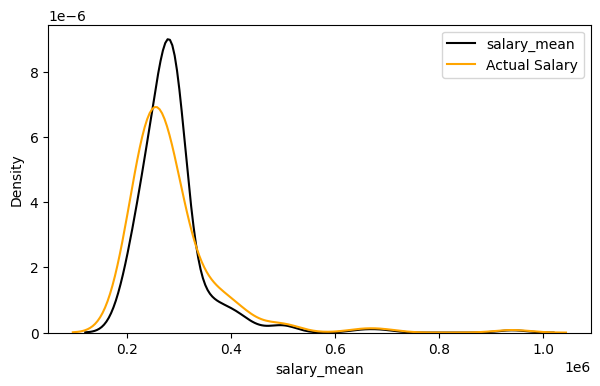

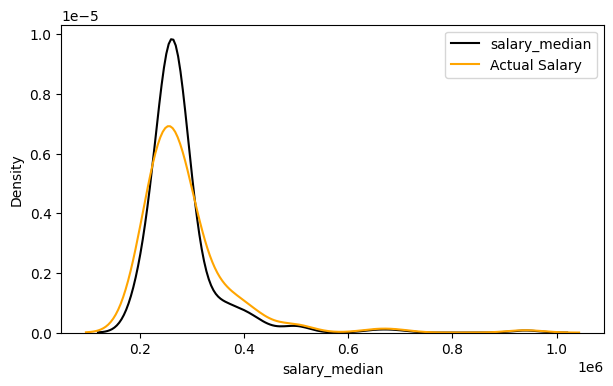

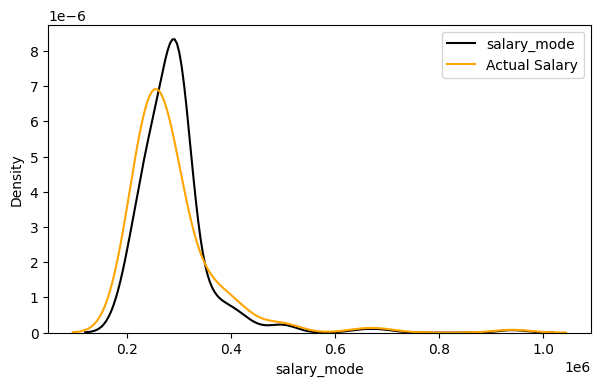

In [11]:
sallist=('salary_mean','salary_median','salary_mode')

for sal in sallist:
    plotdistplot(sal)

In [12]:
#Filling the salary with mean
df['salary']= df['salary'].fillna(df['salary'].median())
df.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  \
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0   
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0   
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0   
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed  265000.0   
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0   

     salary_mean  salary_median  salary_mode  
0  270000.000000       270000.0     270000.0  
1  200000.000000       200000.0     200000.0  
2  250000.000000       250000.0     250000.0  
3  288655.405405       265000.0     300000.0  
4  425000.000000       425000.0     425000.0

In [13]:
df=df.drop(columns=['salary_mean','salary_median','salary_mode'],axis=1)
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

### EDA

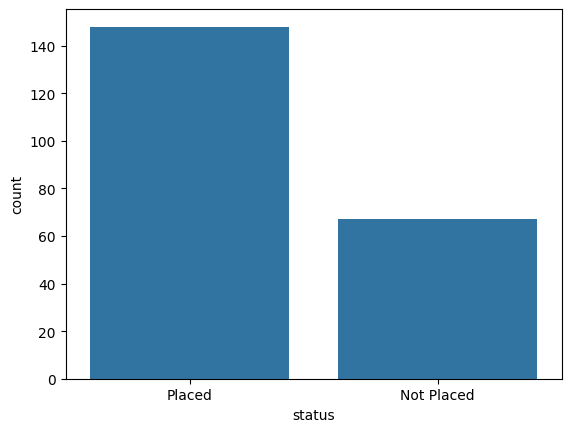

In [14]:
sn.countplot(x=df['status'],data=df)
plt.show()

In [15]:
catvars

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

Countplot for Feature gender is below:


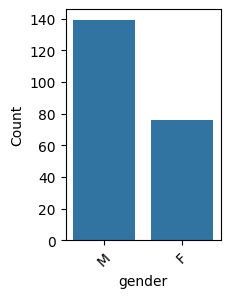

Countplot for Feature ssc_b is below:


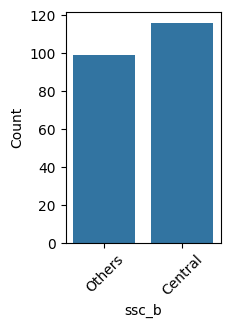

Countplot for Feature hsc_b is below:


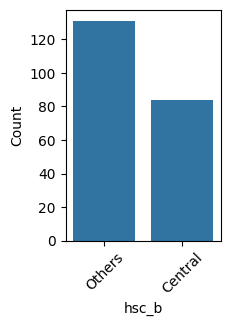

Countplot for Feature hsc_s is below:


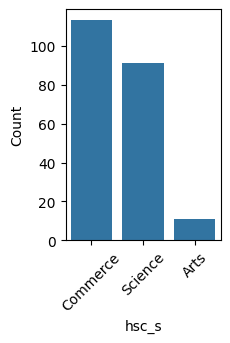

Countplot for Feature degree_t is below:


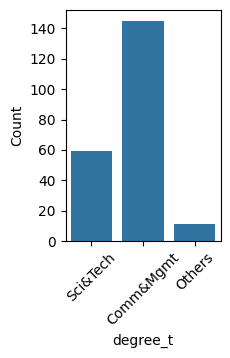

Countplot for Feature workex is below:


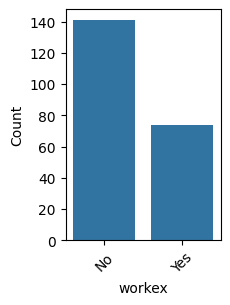

Countplot for Feature specialisation is below:


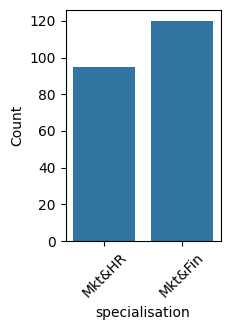

Countplot for Feature status is below:


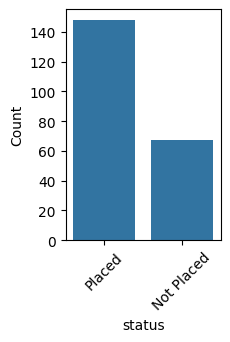

In [16]:
def valuecount(col):
    return dict(df[col].value_counts())

def getcountplot(col):
    plt.figure(figsize=(2,3))
    sn.countplot(x=df[col], data=df)
    plt.xticks(rotation=45)
    plt.xlabel(f"{col}")
    plt.ylabel('Count')
    plt.show()

for col in catvars:
    print(f"Countplot for Feature {col} is below:")
    getcountplot(col)
    print('='*75)
    

In [17]:
getfinaldict={}

for col in catvars:
    getfinaldict[col]=valuecount(col)
getfinaldict

{'gender': {'M': np.int64(139), 'F': np.int64(76)},
 'ssc_b': {'Central': np.int64(116), 'Others': np.int64(99)},
 'hsc_b': {'Others': np.int64(131), 'Central': np.int64(84)},
 'hsc_s': {'Commerce': np.int64(113),
  'Science': np.int64(91),
  'Arts': np.int64(11)},
 'degree_t': {'Comm&Mgmt': np.int64(145),
  'Sci&Tech': np.int64(59),
  'Others': np.int64(11)},
 'workex': {'No': np.int64(141), 'Yes': np.int64(74)},
 'specialisation': {'Mkt&Fin': np.int64(120), 'Mkt&HR': np.int64(95)},
 'status': {'Placed': np.int64(148), 'Not Placed': np.int64(67)}}

In [18]:
#Top Sci&Tech Students Placed
df[(df['degree_t']=='Sci&Tech')&(df['status']=='Placed')].sort_values(by='salary',ascending=False).reset_index().head(5)

index  sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b    hsc_s  degree_p  \
0    150    151      M  71.00  Central  58.66  Central  Science     58.00   
1    174    175      M  73.24   Others  50.83   Others  Science     64.27   
2    163    164      M  63.00   Others  67.00   Others  Science     64.00   
3     77     78      M  64.00   Others  80.00   Others  Science     65.00   
4     53     54      M  80.00   Others  70.00   Others  Science     72.00   

   degree_t workex  etest_p specialisation  mba_p  status    salary  
0  Sci&Tech    Yes     56.0        Mkt&Fin  61.30  Placed  690000.0  
1  Sci&Tech    Yes     64.0        Mkt&Fin  66.23  Placed  500000.0  
2  Sci&Tech     No     75.0        Mkt&Fin  66.46  Placed  500000.0  
3  Sci&Tech    Yes     69.0        Mkt&Fin  57.65  Placed  500000.0  
4  Sci&Tech     No     87.0         Mkt&HR  71.04  Placed  450000.0

In [19]:
#Top Comm&Mgmt Students Placed

df[(df['degree_t']=='Comm&Mgmt')&(df['status']=='Placed')].sort_values(by='salary',ascending=False).reset_index().head(5)

index  sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0    119    120      M  60.80  Central  68.40  Central  Commerce      64.6   
1    177    178      F  73.00  Central  97.00   Others  Commerce      79.0   
2      4      5      M  85.80  Central  73.60  Central  Commerce      73.3   
3     95     96      M  73.00  Central  78.00   Others  Commerce      65.0   
4     85     86      F  83.84   Others  89.83   Others  Commerce      77.2   

    degree_t workex  etest_p specialisation  mba_p  status    salary  
0  Comm&Mgmt    Yes    82.66        Mkt&Fin  64.34  Placed  940000.0  
1  Comm&Mgmt    Yes    89.00        Mkt&Fin  70.81  Placed  650000.0  
2  Comm&Mgmt     No    96.80        Mkt&Fin  55.50  Placed  425000.0  
3  Comm&Mgmt    Yes    95.46        Mkt&Fin  62.16  Placed  420000.0  
4  Comm&Mgmt    Yes    78.74        Mkt&Fin  76.18  Placed  400000.0

In [20]:
# Minimum and maximum salary
# Observation: Minimum Salary= 200000 and Maximum Salary= 940000
df[(df['salary']==max(df['salary'])) | (df['salary']==min(df['salary']))].sort_values(by='salary',ascending=False).reset_index()

index  sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0    119    120      M  60.80  Central  68.40  Central  Commerce     64.60   
1     15     16      F  65.00  Central  75.00  Central  Commerce     69.00   
2      1      2      M  79.33  Central  78.33   Others   Science     77.48   
3     44     45      F  77.00   Others  73.00   Others  Commerce     81.00   
4     50     51      F  75.20  Central  73.20  Central   Science     68.40   
5    107    108      M  82.00   Others  90.00   Others  Commerce     83.00   
6    135    136      F  72.00  Central  56.00   Others   Science     69.00   

    degree_t workex  etest_p specialisation  mba_p  status    salary  
0  Comm&Mgmt    Yes    82.66        Mkt&Fin  64.34  Placed  940000.0  
1  Comm&Mgmt    Yes    72.00        Mkt&Fin  64.66  Placed  200000.0  
2   Sci&Tech    Yes    86.50        Mkt&Fin  66.28  Placed  200000.0  
3  Comm&Mgmt    Yes    89.00        Mkt&Fin  69.70  Placed  200000.0  
4  Comm&Mgmt     No    65.00         Mkt&HR  62.98  Placed  200000.0  
5  Comm&Mgmt     No    80.00         Mkt&HR  73.52  Placed  200000.0  
6  Comm&Mgmt     No    55.60         Mkt&HR  65.63  Placed  200000.0

In [21]:
# Salary of Sci&Tech Student more than the average salary

df[(df['degree_t']=='Sci&Tech') & (df['salary']>df['salary'].mean())].sort_values(by= 'salary',ascending=False).reset_index()

index  sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b    hsc_s  degree_p  \
0     150    151      M  71.00  Central  58.66  Central  Science     58.00   
1      77     78      M  64.00   Others  80.00   Others  Science     65.00   
2     163    164      M  63.00   Others  67.00   Others  Science     64.00   
3     174    175      M  73.24   Others  50.83   Others  Science     64.27   
4      53     54      M  80.00   Others  70.00   Others  Science     72.00   
5      39     40      M  81.00   Others  68.00   Others  Science     64.00   
6     128    129      M  80.40  Central  73.40  Central  Science     77.72   
7     145    146      M  89.40   Others  65.66   Others  Science     71.25   
8      24     25      M  76.50   Others  97.70   Others  Science     78.86   
9      22     23      F  69.80   Others  60.80   Others  Science     72.23   
10     70     71      M  82.00   Others  61.00   Others  Science     62.00   
11    178    179      M  68.00   Others  56.00   Others  Science     68.00   
12    153    154      M  49.00   Others  59.00   Others  Science     65.00   
13     37     38      F  79.00  Central  76.00  Central  Science     65.60   
14     23     24      F  77.40   Others  60.00   Others  Science     64.74   
15     83     84      M  84.00   Others  79.00   Others  Science     68.00   
16     84     85      M  70.00  Central  63.00   Others  Science     70.00   
17    160    161      M  87.00  Central  74.00  Central  Science     65.00   

    degree_t workex  etest_p specialisation  mba_p  status    salary  
0   Sci&Tech    Yes    56.00        Mkt&Fin  61.30  Placed  690000.0  
1   Sci&Tech    Yes    69.00        Mkt&Fin  57.65  Placed  500000.0  
2   Sci&Tech     No    75.00        Mkt&Fin  66.46  Placed  500000.0  
3   Sci&Tech    Yes    64.00        Mkt&Fin  66.23  Placed  500000.0  
4   Sci&Tech     No    87.00         Mkt&HR  71.04  Placed  450000.0  
5   Sci&Tech     No    93.00        Mkt&Fin  62.56  Placed  411000.0  
6   Sci&Tech    Yes    81.20         Mkt&HR  76.26  Placed  400000.0  
7   Sci&Tech     No    72.00         Mkt&HR  63.23  Placed  400000.0  
8   Sci&Tech     No    97.40        Mkt&Fin  74.01  Placed  360000.0  
9   Sci&Tech     No    55.53         Mkt&HR  68.81  Placed  360000.0  
10  Sci&Tech     No    89.00        Mkt&Fin  65.45  Placed  360000.0  
11  Sci&Tech     No    73.00         Mkt&HR  68.07  Placed  350000.0  
12  Sci&Tech    Yes    86.00        Mkt&Fin  62.48  Placed  340000.0  
13  Sci&Tech     No    58.00         Mkt&HR  55.47  Placed  320000.0  
14  Sci&Tech    Yes    92.00        Mkt&Fin  63.62  Placed  300000.0  
15  Sci&Tech    Yes    84.00        Mkt&Fin  66.69  Placed  300000.0  
16  Sci&Tech    Yes    55.00        Mkt&Fin  62.00  Placed  300000.0  
17  Sci&Tech    Yes    75.00         Mkt&HR  72.29  Placed  300000.0

In [22]:
# Salary of Comm&Mgmt Student more than the average salary

df[(df['degree_t']=='Comm&Mgmt') & (df['salary']> df['salary'].mean())].sort_values(by= 'salary',ascending=False).reset_index()

index  sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0     119    120      M  60.80  Central  68.40  Central  Commerce     64.60   
1     177    178      F  73.00  Central  97.00   Others  Commerce     79.00   
2       4      5      M  85.80  Central  73.60  Central  Commerce     73.30   
3      95     96      M  73.00  Central  78.00   Others  Commerce     65.00   
4     210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
5      85     86      F  83.84   Others  89.83   Others  Commerce     77.20   
6      21     22      F  79.00   Others  76.00   Others  Commerce     85.00   
7     101    102      M  63.00  Central  72.00  Central  Commerce     68.00   
8      57     58      M  68.00  Central  76.00  Central  Commerce     74.00   
9     104    105      M  69.00  Central  63.00   Others   Science     65.00   
10     28     29      M  76.76   Others  76.50   Others  Commerce     67.50   
11    125    126      F  84.00  Central  73.00  Central  Commerce     73.00   
12     74     75      M  56.60  Central  64.80  Central  Commerce     70.20   
13     16     17      M  63.00  Central  66.20  Central  Commerce     65.60   
14     90     91      F  85.00   Others  90.00   Others  Commerce     82.00   
15     61     62      M  84.20  Central  73.40  Central  Commerce     66.89   
16     35     36      F  69.00  Central  78.00  Central  Commerce     72.00   
17     43     44      M  87.00   Others  87.00   Others  Commerce     68.00   
18    157    158      M  66.50  Central  62.50  Central  Commerce     60.90   
19    102    103      F  77.00   Others  61.00   Others  Commerce     68.00   
20     81     82      M  81.70   Others  63.00   Others   Science     67.00   
21     96     97      F  76.00  Central  70.00  Central   Science     76.00   
22    132    133      M  67.00   Others  68.00   Others  Commerce     64.00   
23    143    144      M  77.67   Others  64.89   Others  Commerce     70.67   
24    116    117      M  68.20  Central  72.80  Central  Commerce     66.60   
25    108    109      M  61.00  Central  82.00  Central  Commerce     69.00   
26    207    208      M  83.33  Central  78.00   Others  Commerce     61.00   
27    147    148      M  70.00  Central  74.00  Central  Commerce     65.00   
28    200    201      M  69.00   Others  60.00   Others  Commerce     65.00   
29    172    173      M  73.00   Others  58.00   Others  Commerce     56.00   
30    212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
31    171    172      M  80.00   Others  80.00   Others  Commerce     72.00   
32     40     41      F  78.00  Central  77.00   Others  Commerce     80.00   
33    162    163      M  74.20  Central  87.60   Others  Commerce     77.25   

     degree_t workex  etest_p specialisation  mba_p  status    salary  
0   Comm&Mgmt    Yes    82.66        Mkt&Fin  64.34  Placed  940000.0  
1   Comm&Mgmt    Yes    89.00        Mkt&Fin  70.81  Placed  650000.0  
2   Comm&Mgmt     No    96.80        Mkt&Fin  55.50  Placed  425000.0  
3   Comm&Mgmt    Yes    95.46        Mkt&Fin  62.16  Placed  420000.0  
4   Comm&Mgmt     No    91.00        Mkt&Fin  74.49  Placed  400000.0  
5   Comm&Mgmt    Yes    78.74        Mkt&Fin  76.18  Placed  400000.0  
6   Comm&Mgmt     No    95.00        Mkt&Fin  69.06  Placed  393000.0  
7   Comm&Mgmt     No    78.00         Mkt&HR  60.44  Placed  380000.0  
8   Comm&Mgmt     No    80.00        Mkt&Fin  63.59  Placed  360000.0  
9   Comm&Mgmt    Yes    55.00         Mkt&HR  58.23  Placed  360000.0  
10  Comm&Mgmt    Yes    73.35        Mkt&Fin  64.15  Placed  350000.0  
11  Comm&Mgmt     No    75.00        Mkt&Fin  73.33  Placed  350000.0  
12  Comm&Mgmt     No    84.27        Mkt&Fin  67.20  Placed  336000.0  
13  Comm&Mgmt    Yes    60.00        Mkt&Fin  62.54  Placed  300000.0  
14  Comm&Mgmt     No    92.00        Mkt&Fin  68.03  Placed  300000.0  
15  Comm&Mgmt     No    61.60        Mkt&Fin  62.48  Placed  300000.0  
16  Comm&Mgmt 

In [23]:
df.groupby(['degree_t'])['status'].count()

degree_t
Comm&Mgmt    145
Others        11
Sci&Tech      59
Name: status, dtype: int64

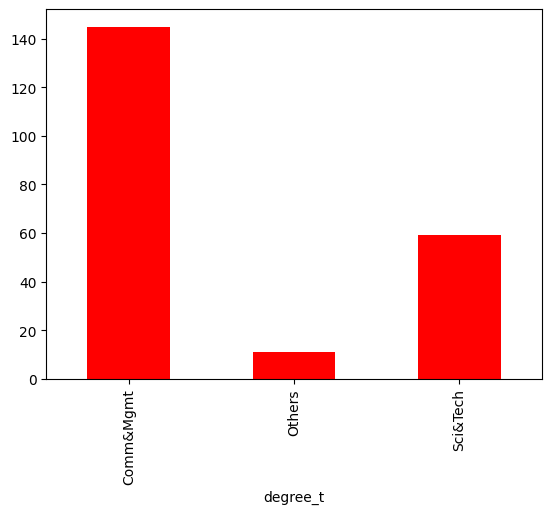

In [24]:
#Bar Plot for count of students according to their degree
df.groupby(['degree_t'])['status'].count().plot(kind='bar',color='red')
plt.show()

In [25]:
df.groupby(['specialisation'])['status'].count()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: status, dtype: int64

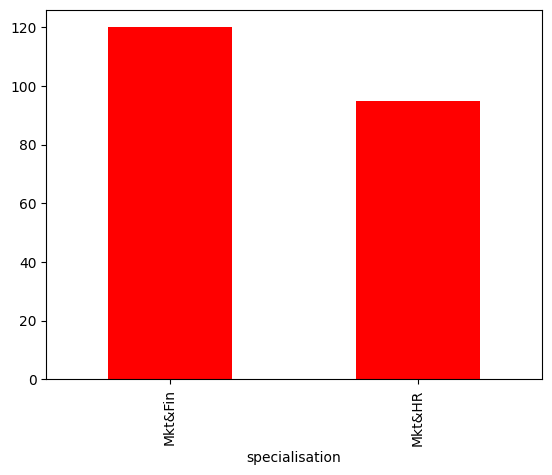

In [26]:
df.groupby(['specialisation'])['status'].count().plot(kind='bar',color='red')
plt.show()

In [27]:
df.groupby(['gender'])['status'].count()

gender
F     76
M    139
Name: status, dtype: int64

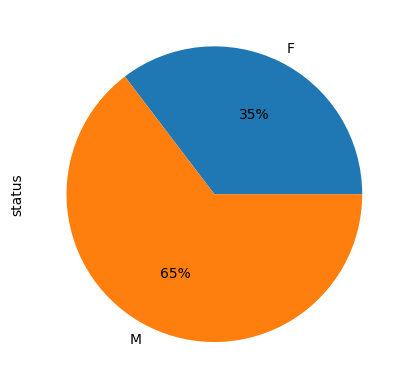

In [28]:
df.groupby(['gender'])['status'].count().plot(kind='pie',autopct='%1.0f%%')
plt.show()

In [29]:
female_data=df[df['gender']=="F"]

In [30]:
#Female with maximum salary
female_data[female_data['salary']==female_data['salary'].max()].style.background_gradient(cmap='plasma')

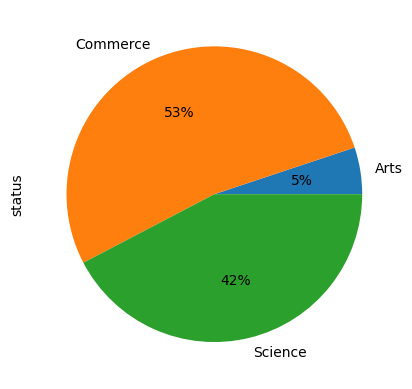

In [31]:
#Bar Plot for count of students according to their hsc_b
df.groupby(['hsc_s'])['status'].count().plot(kind='pie',autopct="%1.0f%%")
plt.show()

## Coverting Object DataTypes into numerical

In [32]:
df.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed  265000.0  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [33]:
getfinaldict

{'gender': {'M': np.int64(139), 'F': np.int64(76)},
 'ssc_b': {'Central': np.int64(116), 'Others': np.int64(99)},
 'hsc_b': {'Others': np.int64(131), 'Central': np.int64(84)},
 'hsc_s': {'Commerce': np.int64(113),
  'Science': np.int64(91),
  'Arts': np.int64(11)},
 'degree_t': {'Comm&Mgmt': np.int64(145),
  'Sci&Tech': np.int64(59),
  'Others': np.int64(11)},
 'workex': {'No': np.int64(141), 'Yes': np.int64(74)},
 'specialisation': {'Mkt&Fin': np.int64(120), 'Mkt&HR': np.int64(95)},
 'status': {'Placed': np.int64(148), 'Not Placed': np.int64(67)}}

In [34]:
getfinaldict.items()

dict_items([('gender', {'M': np.int64(139), 'F': np.int64(76)}), ('ssc_b', {'Central': np.int64(116), 'Others': np.int64(99)}), ('hsc_b', {'Others': np.int64(131), 'Central': np.int64(84)}), ('hsc_s', {'Commerce': np.int64(113), 'Science': np.int64(91), 'Arts': np.int64(11)}), ('degree_t', {'Comm&Mgmt': np.int64(145), 'Sci&Tech': np.int64(59), 'Others': np.int64(11)}), ('workex', {'No': np.int64(141), 'Yes': np.int64(74)}), ('specialisation', {'Mkt&Fin': np.int64(120), 'Mkt&HR': np.int64(95)}), ('status', {'Placed': np.int64(148), 'Not Placed': np.int64(67)})])

In [35]:
boolcols=[key for key, values in getfinaldict.items() if len(getfinaldict[key])==2]

tricols= [key for key, values in getfinaldict.items() if key not in boolcols]

print(boolcols,tricols)


['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'status'] ['hsc_s', 'degree_t']


## Label Encoding Process

In [36]:
getfinaldict.keys()

dict_keys(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'])

In [37]:
def labelencode(le,col):
    df[col]=le.fit_transform(df[col]) # fit -> find unique values(ex-male,female), transform-> unique values ko encode krta h(ex- female=0,male=1)

getmapping={}  #Empty dictionary to save the values

from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

for col in list(getfinaldict.keys()): # Dictionary ki keys ki ek list bna rha h its important fro iteration 
    labelencode(le,col) #label encoder ke object ko call krega 
    getmapping[col]= dict(zip(le.classes_,le.transform(le.classes_))) #le.calsses_ -> uniques values, le.transform-> classes_ ko encode kr rha h

In [38]:
getmapping

{'gender': {'F': np.int64(0), 'M': np.int64(1)},
 'ssc_b': {'Central': np.int64(0), 'Others': np.int64(1)},
 'hsc_b': {'Central': np.int64(0), 'Others': np.int64(1)},
 'hsc_s': {'Arts': np.int64(0),
  'Commerce': np.int64(1),
  'Science': np.int64(2)},
 'degree_t': {'Comm&Mgmt': np.int64(0),
  'Others': np.int64(1),
  'Sci&Tech': np.int64(2)},
 'workex': {'No': np.int64(0), 'Yes': np.int64(1)},
 'specialisation': {'Mkt&Fin': np.int64(0), 'Mkt&HR': np.int64(1)},
 'status': {'Not Placed': np.int64(0), 'Placed': np.int64(1)}}

In [39]:
df.head()

sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0      1       1  67.00      1  91.00      1      1     58.00         2   
1      2       1  79.33      0  78.33      1      2     77.48         2   
2      3       1  65.00      0  68.00      0      0     64.00         0   
3      4       1  56.00      0  52.00      0      2     52.00         2   
4      5       1  85.80      0  73.60      0      1     73.30         0   

   workex  etest_p  specialisation  mba_p  status    salary  
0       0     55.0               1  58.80       1  270000.0  
1       1     86.5               0  66.28       1  200000.0  
2       0     75.0               0  57.80       1  250000.0  
3       0     66.0               1  59.43       0  265000.0  
4       0     96.8               0  55.50       1  425000.0

## Numerical Columns EDA

In [40]:
numvars

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [41]:
df= df.drop(['sl_no'],axis=1)

In [42]:
df.head()

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0       1  67.00      1  91.00      1      1     58.00         2       0   
1       1  79.33      0  78.33      1      2     77.48         2       1   
2       1  65.00      0  68.00      0      0     64.00         0       0   
3       1  56.00      0  52.00      0      2     52.00         2       0   
4       1  85.80      0  73.60      0      1     73.30         0       0   

   etest_p  specialisation  mba_p  status    salary  
0     55.0               1  58.80       1  270000.0  
1     86.5               0  66.28       1  200000.0  
2     75.0               0  57.80       1  250000.0  
3     66.0               1  59.43       0  265000.0  
4     96.8               0  55.50       1  425000.0

In [43]:
numvars

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [44]:
numvars[1:]

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

Distribution plots for col: ssc_p are shown:


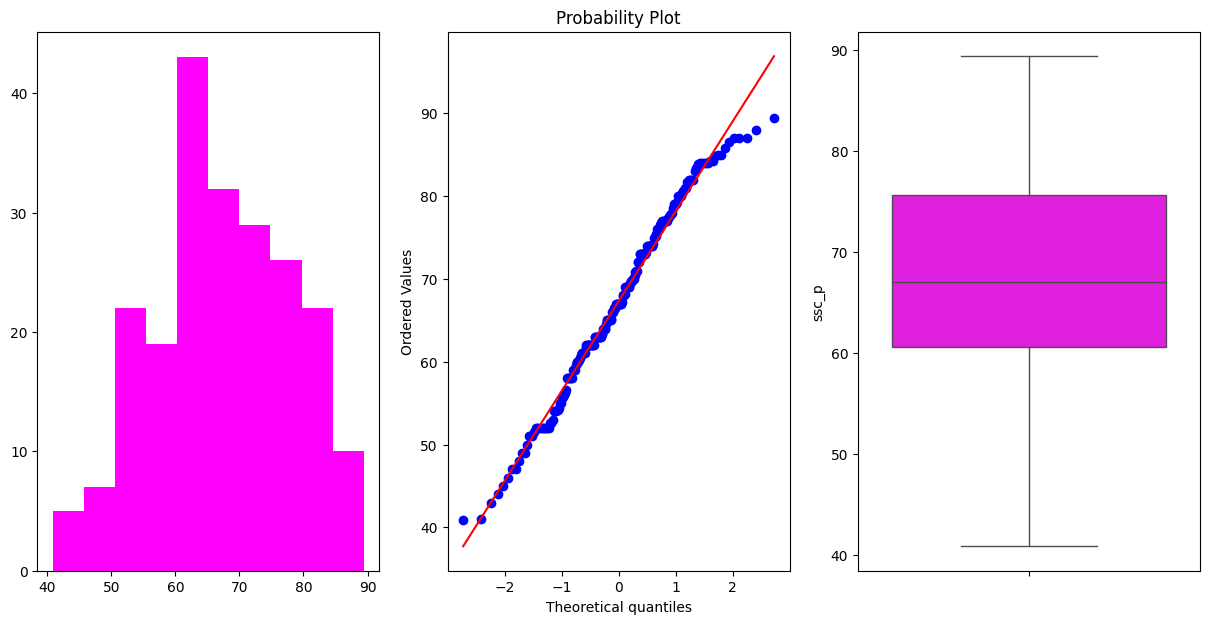

Distribution plots for col: hsc_p are shown:


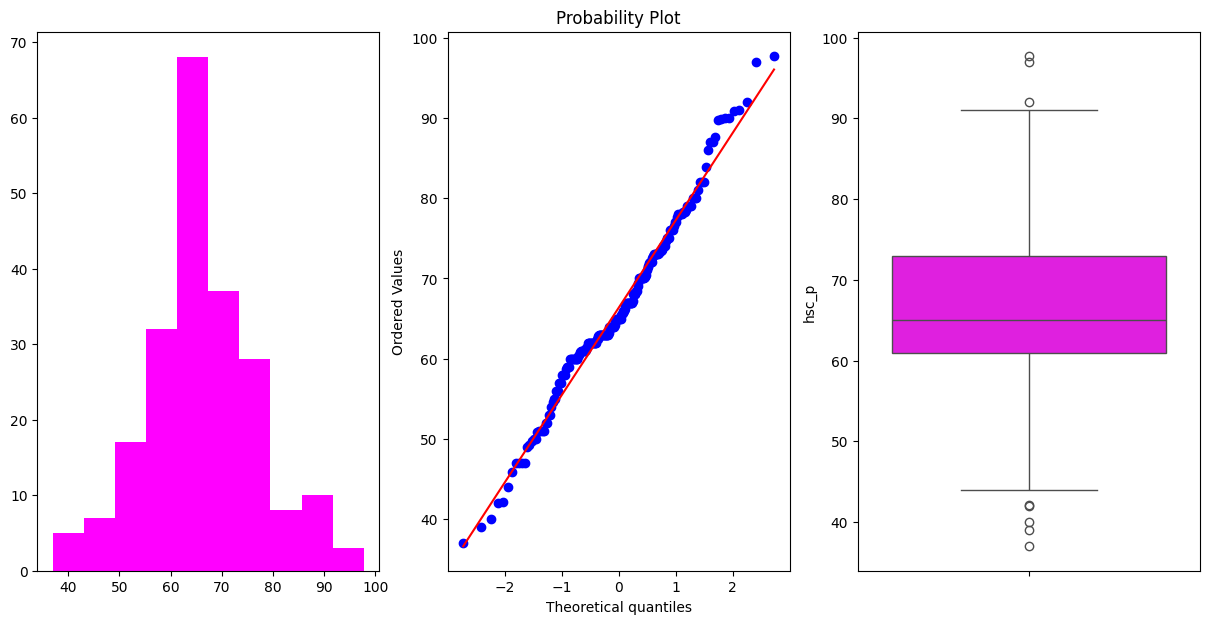

Distribution plots for col: degree_p are shown:


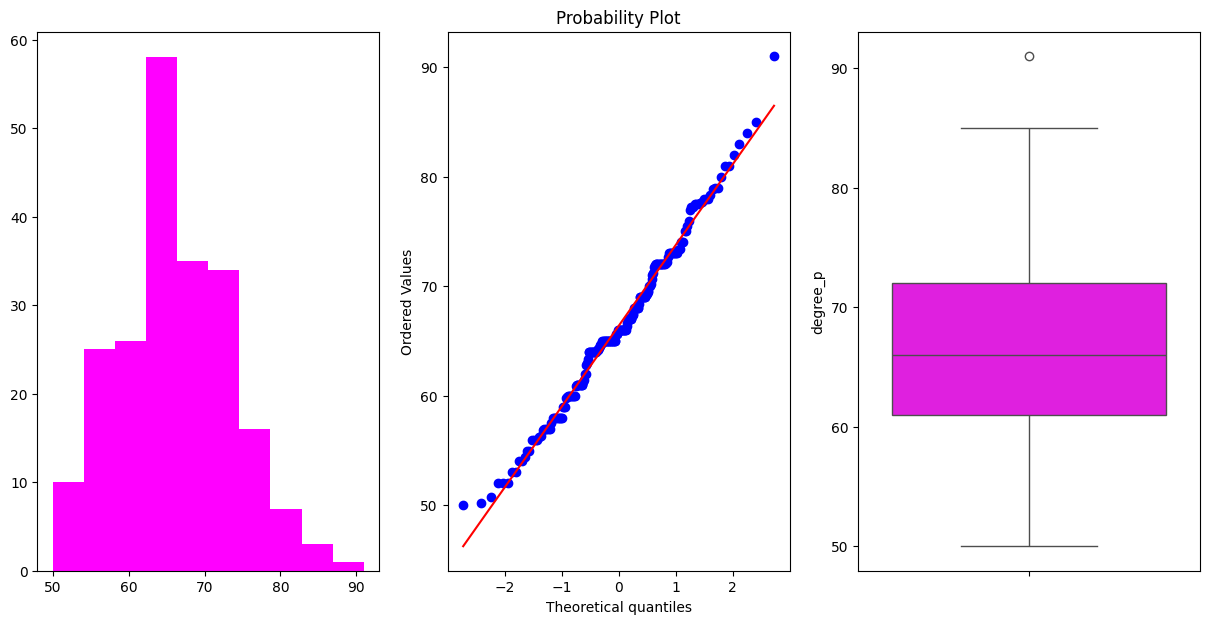

Distribution plots for col: etest_p are shown:


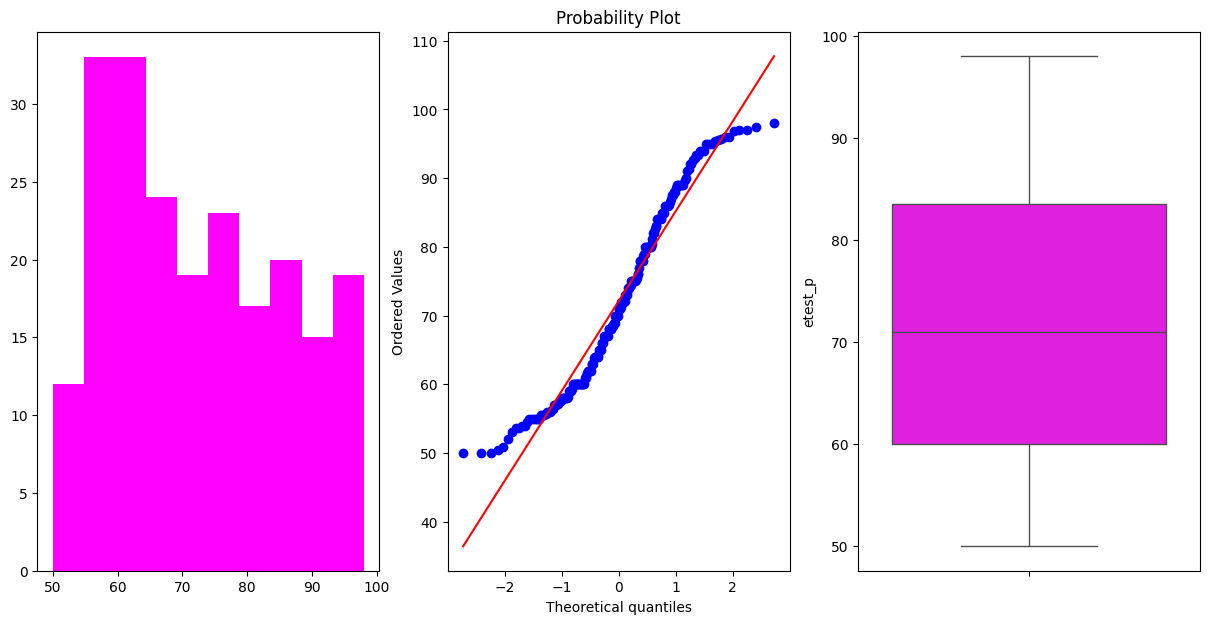

Distribution plots for col: mba_p are shown:


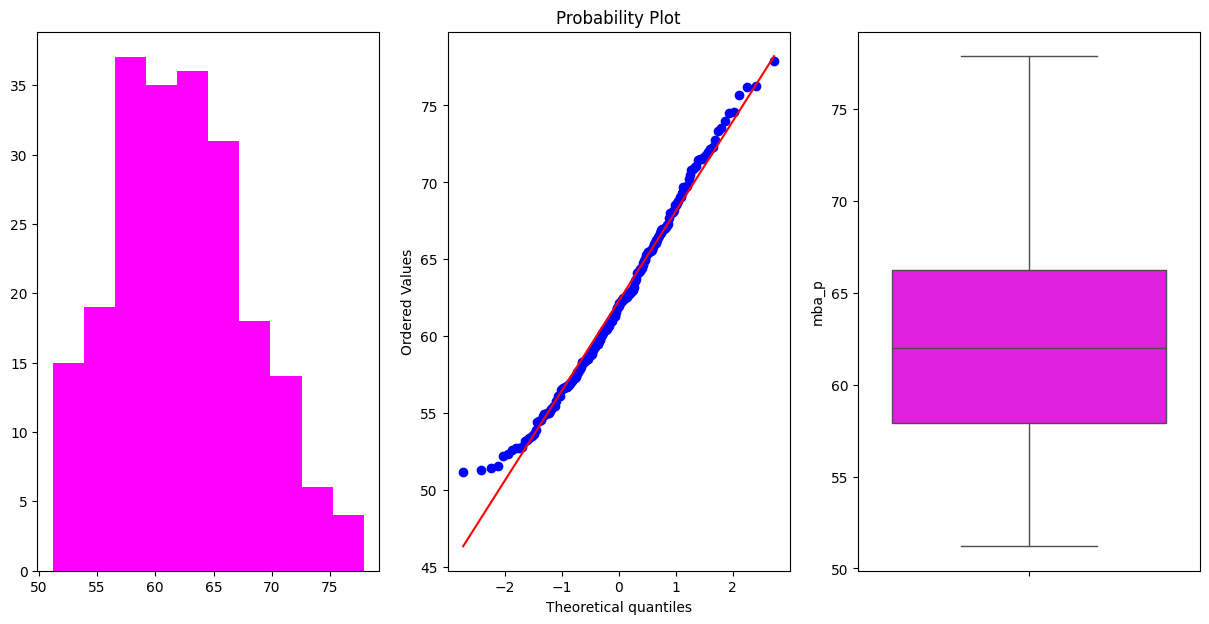

Distribution plots for col: salary are shown:


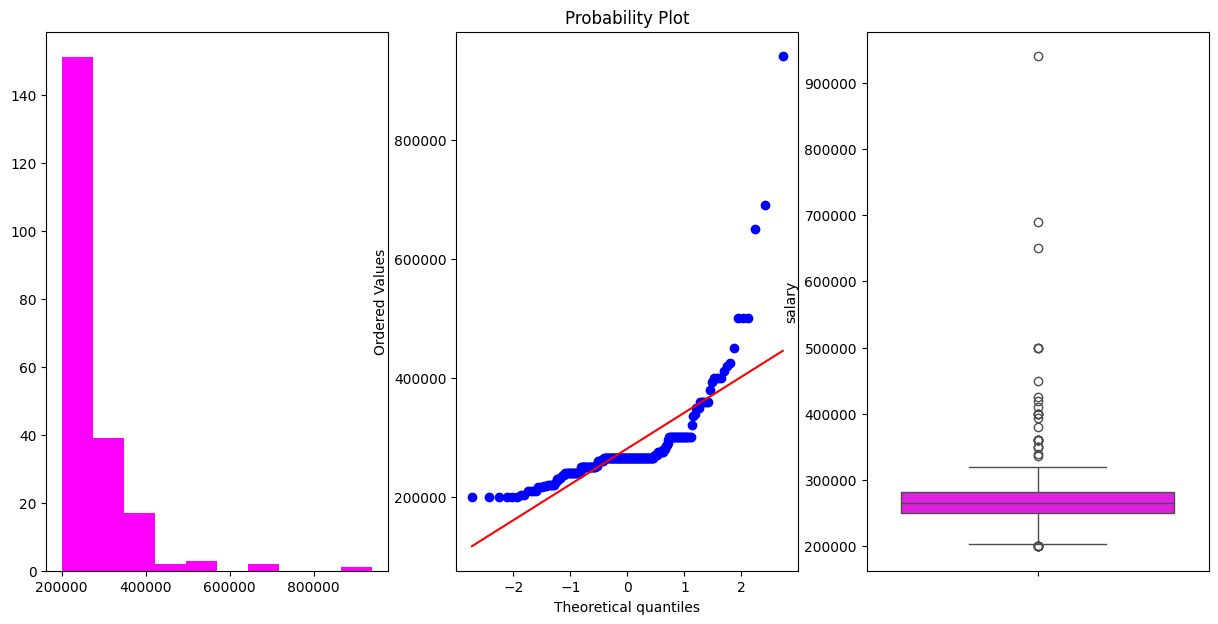

In [45]:
import scipy.stats as stats
def getplots(df,col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color='magenta')

    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)

    plt.subplot(1,3,3)
    sn.boxplot(df[col],color='magenta')
    plt.show()
    
for col in numvars[1:]:
    print(f"Distribution plots for col: {col} are shown:")
    getplots(df,col)
    print("="*10)

## Feature Selection

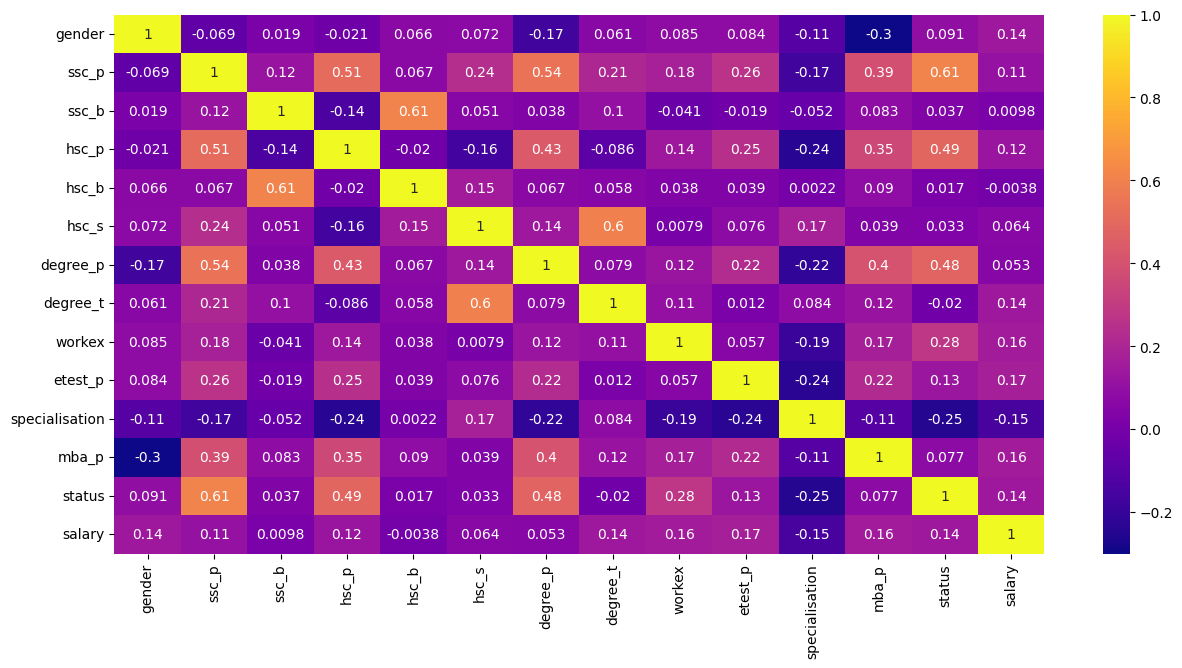

In [46]:
# Checking for the tightly correlated features
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

In [47]:
# Here we will  select features and the value that will  be predicted EX-- select x,y

data= df.copy()
test= data['status']
train= data.drop(['salary','status'],axis=1)

In [48]:
# Extratrees Classifier

from sklearn.ensemble import ExtraTreesClassifier
ec= ExtraTreesClassifier()
ec.fit(train,test)

ExtraTreesClassifier()

In [49]:
#Feature bar used to plot the most affecting fetures to the test means --> Which featyre is more responsible for prediction

featbar= pd.Series(ec.feature_importances_,index=train.columns)

In [50]:
featbar

gender            0.035881
ssc_p             0.243995
ssc_b             0.034029
hsc_p             0.157883
hsc_b             0.031818
hsc_s             0.031485
degree_p          0.165243
degree_t          0.033606
workex            0.055843
etest_p           0.072150
specialisation    0.044602
mba_p             0.093464
dtype: float64

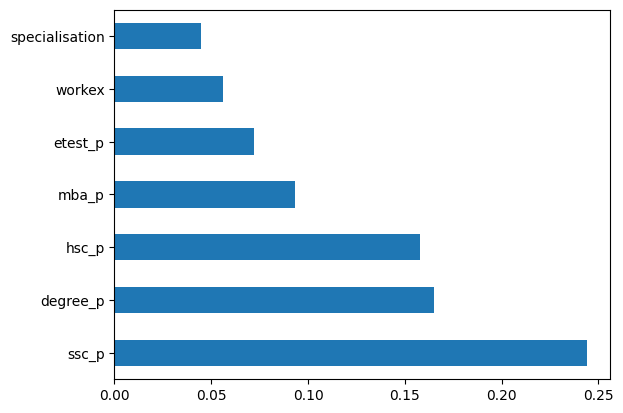

In [51]:
featbar.nlargest(7).plot(kind='barh')
plt.show()

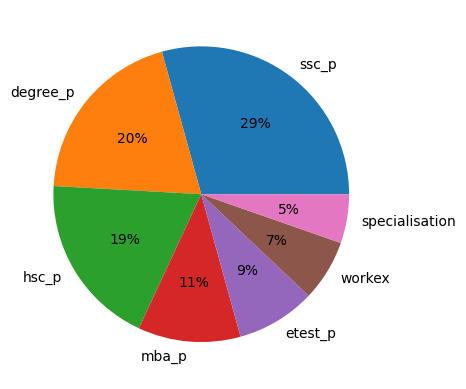

In [52]:
featbar.nlargest(7).plot(kind='pie',autopct="%1.0f%%")
plt.show()

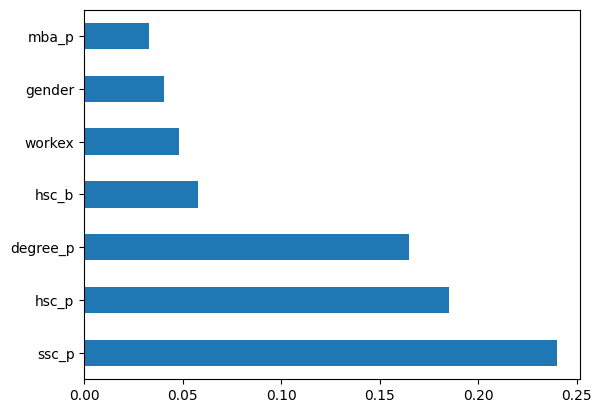

In [53]:
#Mutual Classif --> MI(Mutual info) is info how much X is related to Y means Y X pe kitna depend krta h *** Or model se pehle hi bta deta h

from sklearn.feature_selection import mutual_info_classif
mc= mutual_info_classif(train,test)
ax= pd.Series(mc,index=train.columns)
ax.nlargest(7).plot(kind='barh')
plt.show()

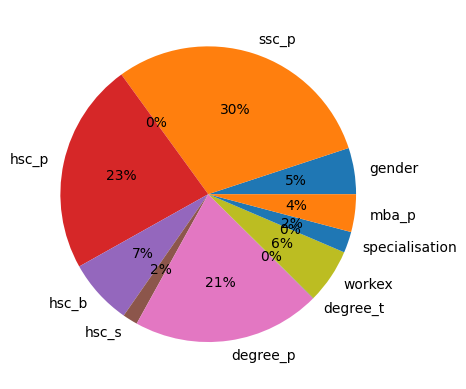

In [54]:
ax.plot(kind='pie',autopct="%1.0f%%")
plt.show()

In [55]:
'''
Selecting top 10 contrubuting features in both cases
and then we will do the intersection of both results 
so that we will get atleast top 5 most contributing features!!
'''

featcols= list(featbar.nlargest(10).index)
muclassif= list(ax.nlargest(10).index)
common_cols= list(set(featcols).intersection(set(muclassif)))
print(common_cols)

['ssc_p', 'hsc_p', 'workex', 'degree_p', 'degree_t', 'gender', 'mba_p', 'specialisation']


In [56]:
# Selecting the common columns and then we will do training on the basis of these columns
# These cols are nlargest of 2 feature selection techniques

train= df[common_cols]
train.head()

ssc_p  hsc_p  workex  degree_p  degree_t  gender  mba_p  specialisation
0  67.00  91.00       0     58.00         2       1  58.80               1
1  79.33  78.33       1     77.48         2       1  66.28               0
2  65.00  68.00       0     64.00         0       1  57.80               0
3  56.00  52.00       0     52.00         2       1  59.43               1
4  85.80  73.60       0     73.30         0       1  55.50               0

In [57]:
getmapping

{'gender': {'F': np.int64(0), 'M': np.int64(1)},
 'ssc_b': {'Central': np.int64(0), 'Others': np.int64(1)},
 'hsc_b': {'Central': np.int64(0), 'Others': np.int64(1)},
 'hsc_s': {'Arts': np.int64(0),
  'Commerce': np.int64(1),
  'Science': np.int64(2)},
 'degree_t': {'Comm&Mgmt': np.int64(0),
  'Others': np.int64(1),
  'Sci&Tech': np.int64(2)},
 'workex': {'No': np.int64(0), 'Yes': np.int64(1)},
 'specialisation': {'Mkt&Fin': np.int64(0), 'Mkt&HR': np.int64(1)},
 'status': {'Not Placed': np.int64(0), 'Placed': np.int64(1)}}

In [58]:
train.head()

ssc_p  hsc_p  workex  degree_p  degree_t  gender  mba_p  specialisation
0  67.00  91.00       0     58.00         2       1  58.80               1
1  79.33  78.33       1     77.48         2       1  66.28               0
2  65.00  68.00       0     64.00         0       1  57.80               0
3  56.00  52.00       0     52.00         2       1  59.43               1
4  85.80  73.60       0     73.30         0       1  55.50               0

In [60]:
train['degree_t'].value_counts()

degree_t
0    145
2     59
1     11
Name: count, dtype: int64

## Model Building

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn import metrics

In [62]:
X_train,X_test,y_train,y_test= train_test_split(train,test,test_size=0.2)
X_train.shape,X_test.shape

((172, 8), (43, 8))

In [63]:
dc= DecisionTreeClassifier()
dc.fit(X_train,y_train)
plt.figure(figsize=(16,9),dpi=1200)
tree.plot_tree(dc,filled=True,class_names=['Not Placed','Placed'],feature_names=X_train.columns)
plt.show()

In [64]:
costpath= dc.cost_complexity_pruning_path(train,test)
ccp_alpha,impurities= costpath.ccp_alphas, costpath.impurities

In [65]:
costpath  #ccp_alphas:- Give aplha values for prunuing of the tree mean how much tree will pruin
# impurties:- Tells how much data is  mixed

{'ccp_alphas': array([0.        , 0.00422833, 0.00422833, 0.00426357, 0.00434109,
        0.00473435, 0.00620897, 0.00697674, 0.00826873, 0.01178068,
        0.01185342, 0.0119541 , 0.01434505, 0.01522199, 0.01963357,
        0.04354394, 0.14599558]),
 'impurities': array([0.        , 0.00845666, 0.01691332, 0.02544045, 0.03412262,
        0.04359133, 0.0684272 , 0.07540395, 0.08367268, 0.14257607,
        0.15442948, 0.19029178, 0.20463683, 0.21985882, 0.23949239,
        0.28303633, 0.42903191])}

In [66]:
modellist=[]
for alpha in ccp_alpha:
    dc= DecisionTreeClassifier(ccp_alpha=alpha)
    dc.fit(X_train,y_train)
    modellist.append(dc)

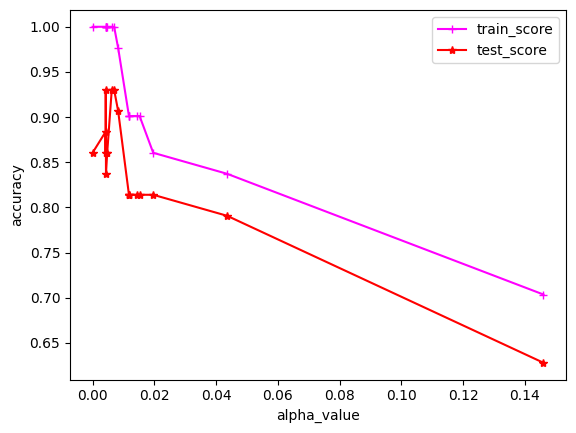

In [67]:
train_score= [clf.score(X_train,y_train) for clf in modellist]
test_score= [clf.score(X_test,y_test) for clf in modellist]

plt.xlabel('alpha_value')
plt.ylabel('accuracy')
plt.plot(ccp_alpha,train_score,label="train_score",marker='+',color='magenta')
plt.plot(ccp_alpha,test_score,label="test_score",marker='*',color='red')
plt.legend()
plt.show()

In [68]:
ccp_alpha

array([0.        , 0.00422833, 0.00422833, 0.00426357, 0.00434109,
       0.00473435, 0.00620897, 0.00697674, 0.00826873, 0.01178068,
       0.01185342, 0.0119541 , 0.01434505, 0.01522199, 0.01963357,
       0.04354394, 0.14599558])

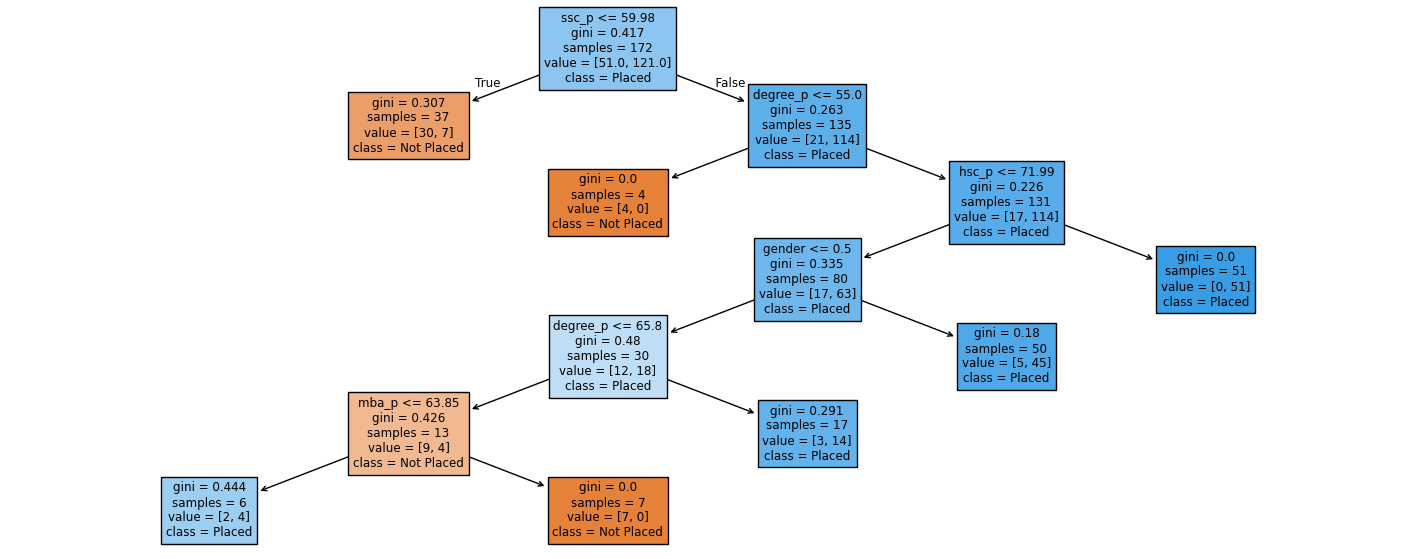

In [69]:
dc= DecisionTreeClassifier(ccp_alpha=0.015221987315010573)
dc.fit(X_train,y_train)
plt.figure(figsize=(18,7))
tree.plot_tree(dc,filled=True,class_names=['Not Placed','Placed'],feature_names=train.columns)
plt.show()

## HyperParameter Tuning

In [70]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=100, stop=1200, num=10)],  # ✅ 1 removed
            'max_depth': [int(x) for x in np.linspace(start=1, stop=30, num=5)],
            'min_samples_split': [2,5,10,12],
            'min_samples_leaf': [2,5,10,12],
            'max_features': ['sqrt', 'log2', None],   # ✅ auto removed
            'ccp_alpha': [0.0185,0.0190,0.0195,0.0200],
        }
    },

    # ✅ Logistic Regression fixed (compatible combos only)
    'logistic':{
        'model': LogisticRegression(),
        'params':{
            'penalty': ['l2'],  # ✅ to avoid mismatch errors
            'C': [0.25,0.50,0.75,1.0],
            'tol': [1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver': ['lbfgs','newton-cg','saga'],   # ✅ removed liblinear for clean multinomial support
            'multi_class': ['auto','ovr','multinomial'],
            'max_iter': [int(x) for x in np.linspace(start=50, stop=250, num=10)],  # ✅ 1 removed
        }
    },

    'D-tree':{
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion': ['gini','entropy'],
            'splitter': ['best','random'],
            'min_samples_split': [2,5,10,12],   # ✅ 1 removed
            'min_samples_leaf': [1,2,5,10,12],
            'max_features': ['sqrt', 'log2', None],  # ✅ auto removed
            'ccp_alpha': [0.0185,0.0190,0.0195,0.0200],
        }
    },

    'SVM':{
        'model': SVC(),
        'params':{
            'C': [0.25,0.50,0.75,1.0],
            'tol': [1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel': ['linear','poly','sigmoid','rbf'],
            'max_iter': [int(x) for x in np.linspace(start=50, stop=250, num=10)],  # ✅ 1 removed
        }
    }
}


In [71]:
scores=[]

for model_name, mp in params.items():
    clf= RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv=5,n_iter=10,n_jobs=-1,scoring='accuracy')
    clf.fit(X_train,y_train)
    scores.append({
        'model_name': model_name,
        'best_score': clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

E:\Anaconda Files\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Anaconda Files\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=183).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [72]:
scores

[{'model_name': 'RandomForest',
  'best_score': np.float64(0.8492436974789916),
  'best_estimator': RandomForestClassifier(ccp_alpha=0.0185, max_depth=22, max_features='log2',
                         min_samples_leaf=2, min_samples_split=10,
                         n_estimators=344)},
 {'model_name': 'logistic',
  'best_score': np.float64(0.8897478991596639),
  'best_estimator': LogisticRegression(C=0.25, max_iter=161, multi_class='auto', solver='newton-cg')},
 {'model_name': 'D-tree',
  'best_score': np.float64(0.8314285714285713),
  'best_estimator': DecisionTreeClassifier(ccp_alpha=0.0195, criterion='entropy',
                         max_features='log2', min_samples_leaf=2,
                         min_samples_split=5)},
 {'model_name': 'SVM',
  'best_score': np.float64(0.8836974789915966),
  'best_estimator': SVC(C=0.25, kernel='linear', max_iter=183, tol=0.75)}]

In [73]:
scores_df= pd.DataFrame(data=scores, columns=['model_name','best_score','best_estimator'])
scores_df.head()

model_name  best_score                                     best_estimator
0  RandomForest    0.849244  (DecisionTreeClassifier(ccp_alpha=0.0185, max_...
1      logistic    0.889748  LogisticRegression(C=0.25, max_iter=161, multi...
2        D-tree    0.831429  DecisionTreeClassifier(ccp_alpha=0.0195, crite...
3           SVM    0.883697  SVC(C=0.25, kernel='linear', max_iter=183, tol...

In [74]:
scores

[{'model_name': 'RandomForest',
  'best_score': np.float64(0.8492436974789916),
  'best_estimator': RandomForestClassifier(ccp_alpha=0.0185, max_depth=22, max_features='log2',
                         min_samples_leaf=2, min_samples_split=10,
                         n_estimators=344)},
 {'model_name': 'logistic',
  'best_score': np.float64(0.8897478991596639),
  'best_estimator': LogisticRegression(C=0.25, max_iter=161, multi_class='auto', solver='newton-cg')},
 {'model_name': 'D-tree',
  'best_score': np.float64(0.8314285714285713),
  'best_estimator': DecisionTreeClassifier(ccp_alpha=0.0195, criterion='entropy',
                         max_features='log2', min_samples_leaf=2,
                         min_samples_split=5)},
 {'model_name': 'SVM',
  'best_score': np.float64(0.8836974789915966),
  'best_estimator': SVC(C=0.25, kernel='linear', max_iter=183, tol=0.75)}]

In [75]:
rf= RandomForestClassifier(ccp_alpha=0.0195, max_depth=8, max_features='log2',
                         min_samples_leaf=5, min_samples_split=5,
                         n_estimators=1077)
rf.fit(X_train,y_train)
y_pred= rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8372093023255814


In [76]:
rf= RandomForestClassifier(n_estimators=500,max_depth=12)
rf.fit(X_train,y_train)
y_pred= rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9069767441860465


In [77]:
lr = LogisticRegression(C=0.25, max_iter=250, multi_class='multinomial',
                     solver='newton-cg')
lr.fit(X_train,y_train)
y_pred= lr.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8837209302325582


E:\Anaconda Files\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [78]:
dc= DecisionTreeClassifier(ccp_alpha=0.019, max_features='log2',
                         min_samples_leaf=12, min_samples_split=5)
dc.fit(X_train,y_train)
y_pred= dc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8604651162790697


In [79]:
print(metrics.classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.90      0.96      0.93        27

    accuracy                           0.91        43
   macro avg       0.91      0.89      0.90        43
weighted avg       0.91      0.91      0.91        43



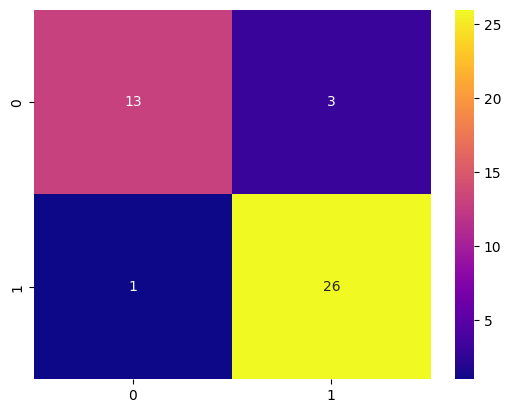

In [80]:
cn= metrics.confusion_matrix(y_test,rf.predict(X_test))
sn.heatmap(cn,annot=True,cmap='plasma')
plt.show()

## Model Testing

In [81]:
train

ssc_p  hsc_p  workex  degree_p  degree_t  gender  mba_p  specialisation
0    67.00  91.00       0     58.00         2       1  58.80               1
1    79.33  78.33       1     77.48         2       1  66.28               0
2    65.00  68.00       0     64.00         0       1  57.80               0
3    56.00  52.00       0     52.00         2       1  59.43               1
4    85.80  73.60       0     73.30         0       1  55.50               0
..     ...    ...     ...       ...       ...     ...    ...             ...
210  80.60  82.00       0     77.60         0       1  74.49               0
211  58.00  60.00       0     72.00         2       1  53.62               0
212  67.00  67.00       1     73.00         0       1  69.72               0
213  74.00  66.00       0     58.00         0       0  60.23               1
214  62.00  58.00       0     53.00         0       1  60.22               1

[215 rows x 8 columns]

In [82]:
traindata=np.array(train)
predicted=[]
for i in range(len(traindata)):
    predicted.append(rf.predict([traindata[i]]))
predicted

E:\Anaconda Files\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
E:\Anaconda Files\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
E:\Anaconda Files\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
E:\Anaconda Files\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
E:\Anaconda Files\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
E:\Anaconda Files\Lib\site-pac

[array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),

In [83]:
print(predicted)

[array([1]), array([1]), array([1]), array([0]), array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([1]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([1]), array([0]), arr

In [84]:
resultdf=train.copy()
resultdf['Actual'] = np.array(test)
resultdf['Predicted']=np.array(predicted)
resultdf.head()

ssc_p  hsc_p  workex  degree_p  degree_t  gender  mba_p  specialisation  \
0  67.00  91.00       0     58.00         2       1  58.80               1   
1  79.33  78.33       1     77.48         2       1  66.28               0   
2  65.00  68.00       0     64.00         0       1  57.80               0   
3  56.00  52.00       0     52.00         2       1  59.43               1   
4  85.80  73.60       0     73.30         0       1  55.50               0   

   Actual  Predicted  
0       1          1  
1       1          1  
2       1          1  
3       0          0  
4       1          1

In [85]:
resultdf['Actual'].value_counts()

Actual
1    148
0     67
Name: count, dtype: int64

In [86]:
resultdf['Predicted'].value_counts()

Predicted
1    150
0     65
Name: count, dtype: int64

## Predicted Probability

In [87]:
traindata= np.array(train)
predicted=[]
for i in range(len(traindata)):
    predicted.append(rf.predict_proba([traindata[i]]))

E:\Anaconda Files\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
E:\Anaconda Files\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
E:\Anaconda Files\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
E:\Anaconda Files\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
E:\Anaconda Files\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
E:\Anaconda Files\Lib\site-pac

In [94]:
predicted

[array([[0.154, 0.846]]),
 array([[0.002, 0.998]]),
 array([[0.07, 0.93]]),
 array([[0.982, 0.018]]),
 array([[0.008, 0.992]]),
 array([[0.586, 0.414]]),
 array([[0.892, 0.108]]),
 array([[0.024, 0.976]]),
 array([[0., 1.]]),
 array([[0.74, 0.26]]),
 array([[0.598, 0.402]]),
 array([[0.014, 0.986]]),
 array([[0.86, 0.14]]),
 array([[0.114, 0.886]]),
 array([[0.908, 0.092]]),
 array([[0.014, 0.986]]),
 array([[0.076, 0.924]]),
 array([[0.888, 0.112]]),
 array([[0.828, 0.172]]),
 array([[0.116, 0.884]]),
 array([[0.03, 0.97]]),
 array([[0.014, 0.986]]),
 array([[0.222, 0.778]]),
 array([[0.048, 0.952]]),
 array([[0.034, 0.966]]),
 array([[0.768, 0.232]]),
 array([[0.004, 0.996]]),
 array([[0.038, 0.962]]),
 array([[0., 1.]]),
 array([[0.43, 0.57]]),
 array([[0.034, 0.966]]),
 array([[0.804, 0.196]]),
 array([[0.08266667, 0.91733333]]),
 array([[0.054, 0.946]]),
 array([[0.972, 0.028]]),
 array([[0.04, 0.96]]),
 array([[0.962, 0.038]]),
 array([[0.052, 0.948]]),
 array([[0.14, 0.86]]),
 a

In [89]:
predicted[0][0], predicted[0][0][0], predicted[0][0][1]

(array([0.154, 0.846]), np.float64(0.154), np.float64(0.846))

In [91]:
resultdf.head()

ssc_p  hsc_p  workex  degree_p  degree_t  gender  mba_p  specialisation  \
0  67.00  91.00       0     58.00         2       1  58.80               1   
1  79.33  78.33       1     77.48         2       1  66.28               0   
2  65.00  68.00       0     64.00         0       1  57.80               0   
3  56.00  52.00       0     52.00         2       1  59.43               1   
4  85.80  73.60       0     73.30         0       1  55.50               0   

   Actual  Predicted  
0       1          1  
1       1          1  
2       1          1  
3       0          0  
4       1          1

In [92]:
resultdf['Prob Not Placed']= np.array([predicted[i][0][0] for i in range(len(predicted))])
resultdf['Prob Placed']= np.array([predicted[i][0][1] for i in range(len(predicted))])
resultdf.head()

ssc_p  hsc_p  workex  degree_p  degree_t  gender  mba_p  specialisation  \
0  67.00  91.00       0     58.00         2       1  58.80               1   
1  79.33  78.33       1     77.48         2       1  66.28               0   
2  65.00  68.00       0     64.00         0       1  57.80               0   
3  56.00  52.00       0     52.00         2       1  59.43               1   
4  85.80  73.60       0     73.30         0       1  55.50               0   

   Actual  Predicted  Prob Not Placed  Prob Placed  
0       1          1            0.154        0.846  
1       1          1            0.002        0.998  
2       1          1            0.070        0.930  
3       0          0            0.982        0.018  
4       1          1            0.008        0.992

In [95]:
import pickle
file= open('campusplacementpredictor.pkl','wb')
pickle.dump(rf,file)
file.close()

### Conclusion
- 4 Records were missclassified in the accuracy of 91% on testing data
- Random Forest gave best results